In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/online_retail.csv",
                dtype = {'CustomerID': str, 'InvoiceID': str},
                encoding = 'ISO-8859-1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df = df.dropna()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


① Description 피처의 텍스트 정보를 확인합니다.

In [4]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 406829, dtype: object

② 텍스트 데이터셋에서 단어를 추출합니다.

In [5]:
# 문자열 단어 추출
words = " ".join(df['Description'].tolist()).split(" ")
words

['WHITE',
 'HANGING',
 'HEART',
 'T-LIGHT',
 'HOLDER',
 'WHITE',
 'METAL',
 'LANTERN',
 'CREAM',
 'CUPID',
 'HEARTS',
 'COAT',
 'HANGER',
 'KNITTED',
 'UNION',
 'FLAG',
 'HOT',
 'WATER',
 'BOTTLE',
 'RED',
 'WOOLLY',
 'HOTTIE',
 'WHITE',
 'HEART.',
 'SET',
 '7',
 'BABUSHKA',
 'NESTING',
 'BOXES',
 'GLASS',
 'STAR',
 'FROSTED',
 'T-LIGHT',
 'HOLDER',
 'HAND',
 'WARMER',
 'UNION',
 'JACK',
 'HAND',
 'WARMER',
 'RED',
 'POLKA',
 'DOT',
 'ASSORTED',
 'COLOUR',
 'BIRD',
 'ORNAMENT',
 "POPPY'S",
 'PLAYHOUSE',
 'BEDROOM',
 '',
 "POPPY'S",
 'PLAYHOUSE',
 'KITCHEN',
 'FELTCRAFT',
 'PRINCESS',
 'CHARLOTTE',
 'DOLL',
 'IVORY',
 'KNITTED',
 'MUG',
 'COSY',
 '',
 'BOX',
 'OF',
 '6',
 'ASSORTED',
 'COLOUR',
 'TEASPOONS',
 'BOX',
 'OF',
 'VINTAGE',
 'JIGSAW',
 'BLOCKS',
 '',
 'BOX',
 'OF',
 'VINTAGE',
 'ALPHABET',
 'BLOCKS',
 'HOME',
 'BUILDING',
 'BLOCK',
 'WORD',
 'LOVE',
 'BUILDING',
 'BLOCK',
 'WORD',
 'RECIPE',
 'BOX',
 'WITH',
 'METAL',
 'HEART',
 'DOORMAT',
 'NEW',
 'ENGLAND',
 'JAM',
 'MAKING

③ 추출한 단어를 이용하여 워드 클라우드를 출력합니다.

In [6]:
from collections import Counter

count = Counter(words)
count

Counter({'WHITE': 16360,
         'HANGING': 13220,
         'HEART': 29443,
         'T-LIGHT': 11531,
         'HOLDER': 12975,
         'METAL': 15897,
         'LANTERN': 1980,
         'CREAM': 6564,
         'CUPID': 284,
         'HEARTS': 4082,
         'COAT': 1331,
         'HANGER': 1695,
         'KNITTED': 471,
         'UNION': 4244,
         'FLAG': 1249,
         'HOT': 8005,
         'WATER': 7625,
         'BOTTLE': 8703,
         'RED': 32590,
         'WOOLLY': 334,
         'HOTTIE': 333,
         'HEART.': 333,
         'SET': 41623,
         '7': 486,
         'BABUSHKA': 2303,
         'NESTING': 354,
         'BOXES': 2405,
         'GLASS': 8997,
         'STAR': 4697,
         'FROSTED': 146,
         'HAND': 4229,
         'WARMER': 3761,
         'JACK': 2984,
         'POLKA': 155,
         'DOT': 91,
         'ASSORTED': 6168,
         'COLOUR': 5144,
         'BIRD': 4416,
         'ORNAMENT': 1418,
         "POPPY'S": 1122,
         'PLAYHOUSE': 1122,
 

In [7]:
# 텍스트 데이터 전처리
import re

def text_cleaning(text):
    # 영어 소문자와 대문자를 제외한 모든 문자를 공백으로 대체
    text = re.sub('[^a-zA-Z]', ' ', text)
    # 모든 공백 제거
    text = text.replace(' ', '')
    return text

def text_cleaning2(text):
    # 영어 소문자와 대문자를 제외한 모든 문자를 공백으로 대체
    pattern = re.compile('[^a-zA-Z]')
    text = pattern.sub(' ', text)
    # 모든 공백 제거
    text = text.replace(' ', '')
    return text

eng_count = Counter({text_cleaning(phrase): counts for phrase, counts in count.items()})
eng_count

Counter({'WHITE': 16360,
         'HANGING': 13220,
         'HEART': 333,
         'TLIGHT': 11531,
         'HOLDER': 12975,
         'METAL': 15897,
         'LANTERN': 1980,
         'CREAM': 6564,
         'CUPID': 284,
         'HEARTS': 4082,
         'COAT': 1331,
         'HANGER': 1695,
         'KNITTED': 471,
         'UNION': 4244,
         'FLAG': 1249,
         'HOT': 8005,
         'WATER': 7625,
         'BOTTLE': 8703,
         'RED': 32590,
         'WOOLLY': 334,
         'HOTTIE': 333,
         'SET': 189,
         '': 2,
         'BABUSHKA': 2303,
         'NESTING': 354,
         'BOXES': 2405,
         'GLASS': 248,
         'STAR': 16,
         'FROSTED': 146,
         'HAND': 4229,
         'WARMER': 3761,
         'JACK': 2984,
         'POLKA': 155,
         'DOT': 91,
         'ASSORTED': 6168,
         'COLOUR': 5144,
         'BIRD': 4416,
         'ORNAMENT': 1418,
         'POPPYS': 1122,
         'PLAYHOUSE': 1122,
         'BEDROOM': 329,
         'KI

In [8]:
# 한 글자, 불용어 제거
from konlpy.tag import Okt
from collections import Counter

stopwords = ['OF', 'OF4', 'ON', 'IS', 'IT', 'TO', 'FOR', 'IF', 'IN']

# 한 글자 제거
remove_count = Counter({x: eng_count[x] for x in eng_count if len(x)>1 and x not in stopwords}) # count[x] : key가 x인 value
remove_count

Counter({'WHITE': 16360,
         'HANGING': 13220,
         'HEART': 333,
         'TLIGHT': 11531,
         'HOLDER': 12975,
         'METAL': 15897,
         'LANTERN': 1980,
         'CREAM': 6564,
         'CUPID': 284,
         'HEARTS': 4082,
         'COAT': 1331,
         'HANGER': 1695,
         'KNITTED': 471,
         'UNION': 4244,
         'FLAG': 1249,
         'HOT': 8005,
         'WATER': 7625,
         'BOTTLE': 8703,
         'RED': 32590,
         'WOOLLY': 334,
         'HOTTIE': 333,
         'SET': 189,
         'BABUSHKA': 2303,
         'NESTING': 354,
         'BOXES': 2405,
         'GLASS': 248,
         'STAR': 16,
         'FROSTED': 146,
         'HAND': 4229,
         'WARMER': 3761,
         'JACK': 2984,
         'POLKA': 155,
         'DOT': 91,
         'ASSORTED': 6168,
         'COLOUR': 5144,
         'BIRD': 4416,
         'ORNAMENT': 1418,
         'POPPYS': 1122,
         'PLAYHOUSE': 1122,
         'BEDROOM': 329,
         'KITCHEN': 2894,
  

In [13]:
import random
import pytagcloud
import webbrowser

ranked_tags = remove_count.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=90)
pytagcloud.create_tag_image(taglist, 'wordcloud_example.jpg', 
                            size=(900, 600),
                            rectangular=False)

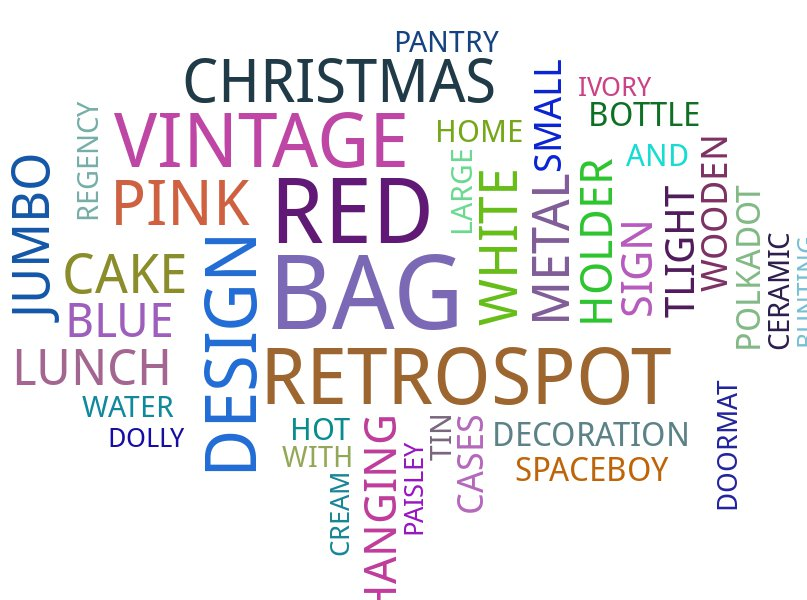

In [14]:
from IPython.display import Image
Image(filename='wordcloud_example.jpg')